In [1]:
#   A forma mais comum de realizar aproximações polinomiais por partes é o uso de Splines Cúbicas # #   entre cada par de pontos sucessivos do domínio.                                               #
#   Normalmente, um poninômio cúbico possui quatro constantes, então há flexibilidade suficiente  # #   na spline cúbica que o interpolante tem ma derivada contínua e uma segunda derivada           #

In [2]:
import numbers as num
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x0 = 2
xn = 4
n = 100
#definindo a função e sua derivada
def f(x):
    return x*x
def f_linha(x):
    return 2*x


In [4]:
#definindo o intervalo de trabalho e pontos do domínio

#dividindo em subintervalos
delta_x = (xn - x0)/n
x = np.zeros((n+1,))

for i in range(n + 1):
    x[i] = x0 + (delta_x * i)

In [5]:
print(x)

[2.   2.02 2.04 2.06 2.08 2.1  2.12 2.14 2.16 2.18 2.2  2.22 2.24 2.26
 2.28 2.3  2.32 2.34 2.36 2.38 2.4  2.42 2.44 2.46 2.48 2.5  2.52 2.54
 2.56 2.58 2.6  2.62 2.64 2.66 2.68 2.7  2.72 2.74 2.76 2.78 2.8  2.82
 2.84 2.86 2.88 2.9  2.92 2.94 2.96 2.98 3.   3.02 3.04 3.06 3.08 3.1
 3.12 3.14 3.16 3.18 3.2  3.22 3.24 3.26 3.28 3.3  3.32 3.34 3.36 3.38
 3.4  3.42 3.44 3.46 3.48 3.5  3.52 3.54 3.56 3.58 3.6  3.62 3.64 3.66
 3.68 3.7  3.72 3.74 3.76 3.78 3.8  3.82 3.84 3.86 3.88 3.9  3.92 3.94
 3.96 3.98 4.  ]


In [6]:
len(x)

101

In [7]:
#definindo o vetor de parâmetros
a = np.zeros((n+1,))
for i in range(n + 1):
    a[i] = f(x[i])
    
#definindo os ultimos inputs
fpo = f_linha(x[0])
fpn = f_linha(x[n])

In [8]:
print(a)

[ 4.      4.0804  4.1616  4.2436  4.3264  4.41    4.4944  4.5796  4.6656
  4.7524  4.84    4.9284  5.0176  5.1076  5.1984  5.29    5.3824  5.4756
  5.5696  5.6644  5.76    5.8564  5.9536  6.0516  6.1504  6.25    6.3504
  6.4516  6.5536  6.6564  6.76    6.8644  6.9696  7.0756  7.1824  7.29
  7.3984  7.5076  7.6176  7.7284  7.84    7.9524  8.0656  8.1796  8.2944
  8.41    8.5264  8.6436  8.7616  8.8804  9.      9.1204  9.2416  9.3636
  9.4864  9.61    9.7344  9.8596  9.9856 10.1124 10.24   10.3684 10.4976
 10.6276 10.7584 10.89   11.0224 11.1556 11.2896 11.4244 11.56   11.6964
 11.8336 11.9716 12.1104 12.25   12.3904 12.5316 12.6736 12.8164 12.96
 13.1044 13.2496 13.3956 13.5424 13.69   13.8384 13.9876 14.1376 14.2884
 14.44   14.5924 14.7456 14.8996 15.0544 15.21   15.3664 15.5236 15.6816
 15.8404 16.    ]


In [9]:
print(len(a))

101


In [10]:
#passo 1
h = np.zeros((n,))
for i in range(n):
    h[i] = x[i + 1] - x[i]

In [11]:
print(h)

[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02]


In [12]:
len(h)

100

In [13]:
#passo 2
alphas = np.zeros((n+1,))
alphas[0] = (3*(a[1] - a[0])/h[0]) - 3*fpo
alphas[n] = 3*fpn - 3*(a[n] - a[n - 1])/h[n - 1]

In [14]:
#passo 3
for i in range(1, n):
    alpha_i = (3*(a[i + 1] - a[i]))/h[i]  -  (3*(a[i] - a[i - 1]))/h[i - 1]
    alphas[i] = alpha_i

In [15]:
print(alphas)

[0.06 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12
 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12
 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12
 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12
 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12
 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12
 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12
 0.12 0.12 0.06]


In [16]:
print(len(alphas))

101


In [17]:
l = np.array((n+1,))
u = np.array((n+1,))
z = np.array((n+1,))
l[0] = 2*h[0]

In [18]:
l[0]

0

In [19]:
#passo 4: Resolução do sistema tridiagonal

l = np.zeros((n+1,))
u = np.zeros((n+1,))
z = np.zeros((n+1,))

#Definição dos parâmetros iniciais
l[0] = 2*h[0]
u[0] = 0.5
z[0] = alphas[0]/l[0]

#Passo 5
#Inserir os valores nos vetores  de parâmetros, exceto o elemento 0
for i in range(1, n):
    l[i] = 2*(x[i + 1] -  x[i - 1]) - h[i - 1]*u[i - 1]
    
    u[i] = h[i]/l[i]

    z[i] = (alphas[i] - (h[i-1]*z[i-1]))/l[i]

In [20]:
#Passo 6
l[n] = (h[n - 1]*(2 - u[n - 1])) # l_n
z[n] = (alphas[n] - h[n - 1]*z[n - 1])/l[n] # z_n

c = np.zeros((n+1,))
c[n] = z[n]

In [21]:
b = np.zeros((n+1,))
d = np.zeros((n+1,))
#Passo 7
for j in range(n-1, -1, -1):
    c[j] = z[j] - (u[j]*c[j+1])

    b[j] = (a[j + 1] - a[j])/h[j] - (h[j]*(c[j + 1] + 2*c[j]))/3

    d[j] = (c[j + 1] - c[j])/3*h[j]


In [22]:
def sj(xi, j):
    return a[j] + b[j]*(xi-x[j]) + c[j]*(xi-x[j])**2 + d[j]*(xi-x[j])**3

def s(xi):
    indice = ((xi - x[0]) // h[0]).astype(int)
    return sj(xi, indice)

In [23]:
x_teste = np.linspace(x[0], x[n], 3000)
y_teste = s(x_teste)

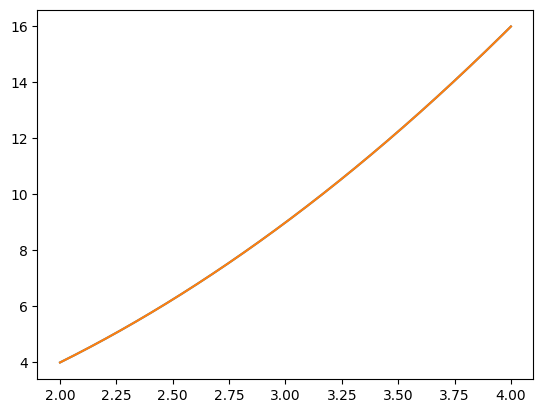

In [24]:
import matplotlib.pyplot as plt
plt.plot(x_teste, y_teste)
plt.plot(x_teste, f(x_teste))

In [6]:
from splines import Spline

In [7]:
spline = Spline(x0=2, xn=4, n=100, f=f, f_linha=f_linha)

In [8]:
spline.interpolate()

In [9]:
spline.plot()